# 2023 Towson University Data Analytics Competition



### Objectives
##### 1. Employee Utilization 
- Group & sort clients by eu (high to low)
- Group & sort employees by eu (high to low)
- Filter
     
##### 2. Profitability
- Group & sort clients by total amount 
- Group and sort profitability by year and quarter

In [3]:
import time
import pandas as pd
from tqdm import tqdm
import matplotlib.pyplot as plt


Matplotlib created a temporary config/cache directory at /var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/matplotlib-g7qh3n8z because the default path (/Users/Yousefmacer/.matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


In [4]:
df = pd.read_csv('SCHGROUP_data.csv')  
df.tail(3)

,ClientNum,Date,DeptID,DeptName,EmployeeId,BillType,Hours,BillRate,TotalAmount
1015479,CLT2417,12/8/2020,27,TAS - Audit,1516,Billable,0.5,$321.75,$160.88
1015480,CLT1695,12/8/2020,26,TAS - Wealth Management,1516,Billable,6.0,$-,$-
1015481,CLT1695,12/8/2020,26,TAS - Wealth Management,1516,Billable,4.0,$-,$-


In [5]:
hours = df[["EmployeeId", "ClientNum", "BillType", "Hours"]]
employee_ids = list(hours.EmployeeId.unique())
client_ids =list(hours.ClientNum.unique())

### Employee Utilization 

In [6]:
def get_rates(field):
    if field == "employee_id":
        ids = list(hours.EmployeeId.unique())
        field = "EmployeeId"
    elif field == "client_id":
        ids =list(hours.ClientNum.unique())
        field = "ClientNum"
    util_rates = []
    for i in tqdm(ids):
        df = hours.loc[hours[field]==i]
        billable = float(sum(list(df.loc[df['BillType'] == 'Billable']["Hours"])))
        nonbillable = float(sum(list(df.loc[df['BillType'] == 'NonBillable']["Hours"])))
        total = billable + nonbillable

        try:
            data = {field:i,
                    "billable":billable,
                    "total":total,
                    "ratio": float(round(((billable/total) * 100),2))}
            util_rates.append(data)
        except:
            data["billable_ratio"]=0
    new_df = pd.DataFrame(util_rates)
    return new_df

In [7]:
path = "/Users/Yousefmacer/Github/sch-group/ouput/employee_rates.csv"
#e_rates = get_rates("employee_id")
#e_rates.to_csv(path, index=False)

### Client Profitability

In [8]:
def return_total(in_put):
    filtered_list = []
    amounts = in_put.split("$")
    for value in amounts:
        v= value.strip()
        try:filtered_list.append(float(v))
        except:pass
    total = round(sum(filtered_list),2)
    return total

In [9]:
grouped = df.groupby('ClientNum')
total_amounts = grouped['TotalAmount'].sum()
client_totals = []
for client_num, total_amount in total_amounts.iteritems():
    total = return_total(total_amount)
    client_totals.append({"ClientNum":client_num, "Profit": total})
client_totals = pd.DataFrame(client_totals)
path = "/Users/Yousefmacer/Github/sch-group/ouput/client_totals.csv"
client_totals.to_csv(path, index=False)
client_totals

,ClientNum,Profit
0,CLT1000,6728.63
1,CLT1001,6817.12
2,CLT1002,19634.80
3,CLT1003,5710.54
4,CLT1004,20823.96
...,...,...
3044,CLT4044,8468.00
3045,CLT4045,11360.46
3046,CLT4046,290.92
3047,CLT4047,58319.97


### Quarterly Revenue 

In [10]:
# convert the date column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
# 2019 Quarterly Revenue
q1 = pd.date_range(start='2019-01-01', end='2019-03-31')
q2 = pd.date_range(start='2019-04-01', end='2019-06-30')
q3 = pd.date_range(start='2019-07-01', end='2019-09-30')
q4 = pd.date_range(start='2019-10-01', end='2019-12-31')

# filter the dataframe for each quarter
q1_2019 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2019 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2019 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2019 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)

q1_2019_profit = q1_2019['TotalAmount'].sum()
q1_2019_profit = return_total(q1_2019_profit)

q2_2019_profit = q2_2019['TotalAmount'].sum()
q2_2019_profit = return_total(q2_2019_profit)

q3_2019_profit = q3_2019['TotalAmount'].sum()
q3_2019_profit = return_total(q3_2019_profit)

q4_2019_profit = q4_2019['TotalAmount'].sum()
q4_2019_profit = return_total(q4_2019_profit)


In [12]:
# 2020 Quarterly Revenue
q1 = pd.date_range(start='2020-01-01', end='2020-03-31')
q2 = pd.date_range(start='2020-04-01', end='2020-06-30')
q3 = pd.date_range(start='2020-07-01', end='2020-09-30')
q4 = pd.date_range(start='2020-10-01', end='2020-12-31')

# filter the dataframe for each quarter
q1_2020 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2020 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2020 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2020 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)

q1_2020_profit = q1_2020['TotalAmount'].sum()
q1_2020_profit = return_total(q1_2020_profit)

q2_2020_profit = q2_2020['TotalAmount'].sum()
q2_2020_profit = return_total(q2_2020_profit)

q3_2020_profit = q3_2020['TotalAmount'].sum()
q3_2020_profit = return_total(q3_2020_profit)

q4_2020_profit = q4_2020['TotalAmount'].sum()
q4_2020_profit = return_total(q4_2020_profit)

In [13]:
# 2021 Quarterly Revenue
q1 = pd.date_range(start='2021-01-01', end='2021-03-31')
q2 = pd.date_range(start='2021-04-01', end='2021-06-30')
q3 = pd.date_range(start='2021-07-01', end='2021-09-30')
q4 = pd.date_range(start='2021-10-01', end='2021-12-31')

# filter the dataframe for each quarter
q1_2021 = df[df['Date'].isin(q1)].sort_values(by='Date', ascending=True)
q2_2021 = df[df['Date'].isin(q2)].sort_values(by='Date', ascending=True)
q3_2021 = df[df['Date'].isin(q3)].sort_values(by='Date', ascending=True)
q4_2021 = df[df['Date'].isin(q4)].sort_values(by='Date', ascending=True)

q1_2021_profit = q1_2021['TotalAmount'].sum()
q1_2021_profit = return_total(q1_2021_profit)

q2_2021_profit = q2_2021['TotalAmount'].sum()
q2_2021_profit = return_total(q2_2021_profit)

q3_2021_profit = q3_2021['TotalAmount'].sum()
q3_2021_profit = return_total(q3_2021_profit)

q4_2021_profit = q4_2021['TotalAmount'].sum()
q4_2021_profit = return_total(q4_2021_profit)

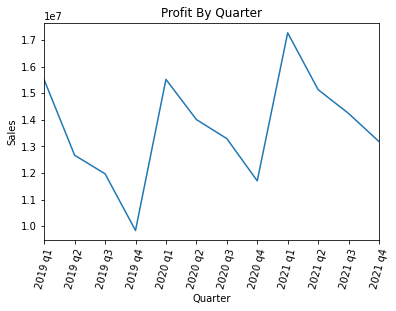

In [14]:
x = ['2019 q1', '2019 q2', '2019 q3', '2019 q4',
     '2020 q1', '2020 q2', '2020 q3', '2020 q4',
     '2021 q1', '2021 q2', '2021 q3', '2021 q4']
y = [q1_2019_profit, q2_2019_profit, q3_2019_profit, q4_2019_profit,
     q1_2020_profit, q2_2020_profit, q3_2020_profit, q4_2020_profit,
     q1_2021_profit, q2_2021_profit, q3_2021_profit, q4_2021_profit]

plt.plot(x, y)

plt.title('Profit By Quarter')
plt.xlabel('Quarter')
plt.ylabel('Sales')

plt.xlim(0, 11)

# rotate the x tick labels
plt.xticks(rotation=75)
plt.show()


### Average Employee Utilization By Department 

In [20]:
departments = df[["DeptID", "DeptName","EmployeeId","BillType","Hours"]]
departments = departments.sort_values(by='DeptID')
departments.tail(100)


hours_by_dept_billtype = df.groupby(['DeptID', 'BillType'])['Hours'].sum()
print(hours_by_dept_billtype)


DeptID  BillType   
0       Billable            0.00
        NonBillable    932134.11
12      Billable       188772.00
        NonBillable         1.50
26      Billable       103090.17
        NonBillable       888.65
27      Billable       238822.08
        NonBillable       243.20
29      Billable        51995.95
        NonBillable         0.50
30      Billable        91629.14
        NonBillable         4.25
41      Billable        59250.01
43      Billable       147296.25
        NonBillable        20.10
46      Billable          269.25
51      Billable        34658.95
        NonBillable        11.00
52      Billable        41870.67
        NonBillable        83.20
53      Billable        12081.49
        NonBillable         2.00
54      Billable         2589.28
55      Billable        41887.34
56      Billable        34631.86
        NonBillable         0.50
Name: Hours, dtype: float64


### Revenue By Department 